In [ ]:
!pip install kaggle
!mkdir kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import json 
kaggleAPIToken = {"username":"lephanvanviet","key":"5ce69bf8b6c7991dd0cdf4c0731e2f39"}
with open('/content/kaggle/kaggle.json', 'w') as file:
    json.dump(kaggleAPIToken, file)

In [ ]:
!chmod 600 /content/kaggle/kaggle.json
!sudo mkdir ~/.kaggle
!cp /content/kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download -d lephanvanviet/snakes

 94% 241M/256M [00:02<00:00, 132MB/s]
100% 256M/256M [00:02<00:00, 104MB/s]


In [ ]:
!unzip /content/snakes.zip

Archive:  /content/snakes.zip
  inflating: Snakes/Milk_Snake/Image_milk_001.png  
  inflating: Snakes/Milk_Snake/Image_milk_002.jpg  
  inflating: Snakes/Milk_Snake/Image_milk_003.jpg  
  inflating: Snakes/Milk_Snake/Image_milk_004.jpg  
  inflating: Snakes/Milk_Snake/Image_milk_005.jpg  
  inflating: Snakes/Milk_Snake/Image_milk_006.jpg  
  inflating: Snakes/Milk_Snake/Image_milk_007.jpg  
  inflating: Snakes/Milk_Snake/Image_milk_008.jpg  
  inflating: Snakes/Milk_Snake/Image_milk_009.jpg  
  inflating: Snakes/Milk_Snake/Image_milk_010.jpg  
  inflating: Snakes/Milk_Snake/Image_milk_011.jpg  
  inflating: Snakes/Milk_Snake/Image_milk_012.jpg  
  inflating: Snakes/Milk_Snake/Image_milk_013.jpg  
  inflating: Snakes/Milk_Snake/Image_milk_014.jpg  
  inflating: Snakes/Milk_Snake/Image_milk_015.jpg  
  inflating: Snakes/Milk_Snake/Image_milk_016.jpg  
  inflating: Snakes/Milk_Snake/Image_milk_017.jpg  
  inflating: Snakes/Milk_Snake/Image_milk_018.jpg  
  inflating: Snakes/Milk_Snake/Ima

In [3]:
import numpy as np
import pandas as pd
import os
import random
import re
import cv2
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
import itertools
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
file = "/content/Snakes/"
categories = ['Milk_Snake', 'Ran_cap_nia', 'Ran_ho_mang', 'Ran_hoa_co_do', 'Ran_luc_cuom_(Protobothrops_mucrosquamatus)', 'Ran_luc_duoi_do', 'Ran_nuoc_(dendrelaphis_pictus)', 'Ran_nuoc_(xenochrophis_piscator)']

In [ ]:
filenames_list = []
categories_list = []

df = df = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list,
})

df = pd.DataFrame(columns= ['image_path','category'])

for category in categories:
    filenames = os.listdir(file + category+"/")
    for filename in filenames:
        file_path = file + category+"/"+filename
        df2 = {'image_path': file_path, 'category': category}
        df = df.append(df2, ignore_index = True)
    

In [ ]:
df.head(2)

,image_path,category
0,/content/Snakes/Milk_Snake/Image_milk_001.png,Milk_Snake
1,/content/Snakes/Milk_Snake/Image_milk_005.jpg,Milk_Snake


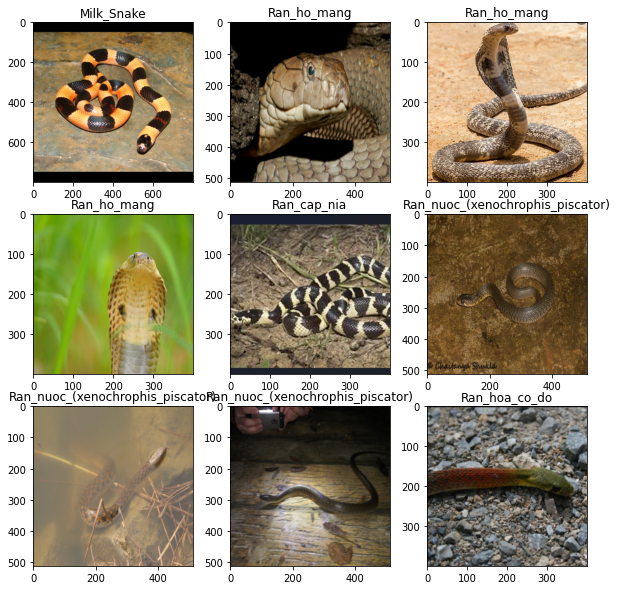

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    random_row = random.randint(0, len(df)-1)
    sample = df.iloc[random_row]
    random_image = image.load_img(sample['image_path'])
    plt.subplot(330 + 1 + i)
    plt.title(sample['category'])
    plt.imshow(random_image)
plt.show()

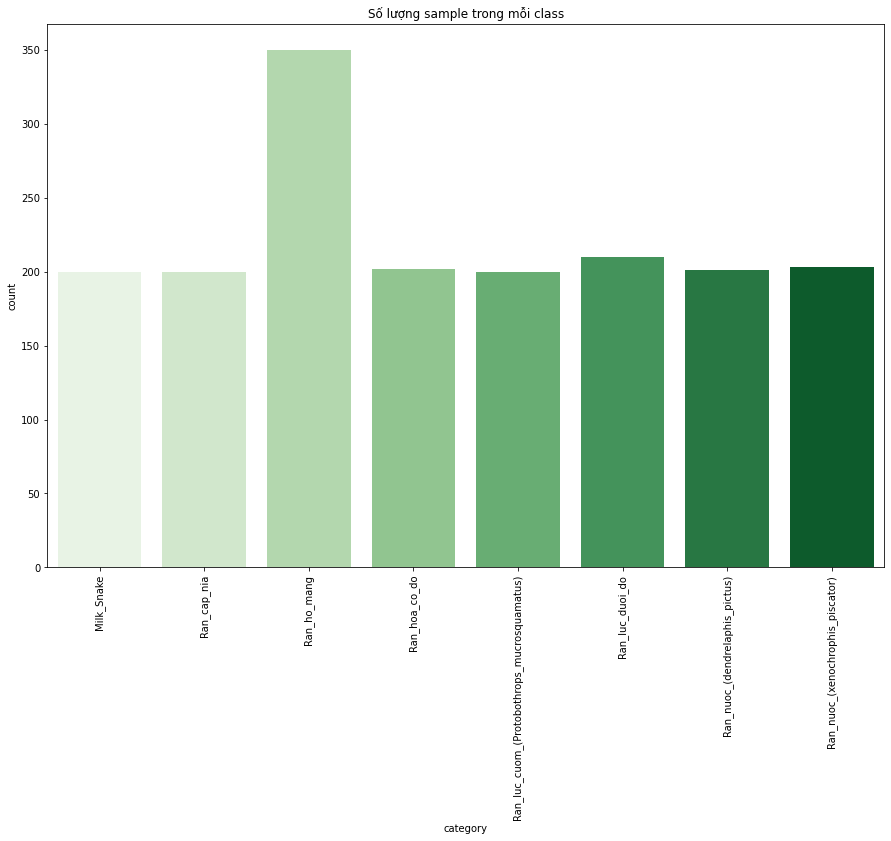

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="category", data=df, palette='Greens')
plt.xticks(rotation=90)
plt.title('Số lượng sample trong mỗi class')
plt.show()

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=1)
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=1)

In [ ]:
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [ ]:
aug_train = ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.1,
                         rescale=1./255,
                         rotation_range=45,
                         brightness_range= [0.5, 1.0],
                         zoom_range=[0.5,1.0],
                         width_shift_range = 0.2,
                         height_shift_range = 0.2)
aug_val = ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.1,
                         rescale=1./255,
                         rotation_range=45,
                         brightness_range= [0.5, 1.0],
                         zoom_range=[0.5,1.0],
                         width_shift_range = 0.2,
                         height_shift_range = 0.2)
aug_test = ImageDataGenerator(rescale=1./255)

In [ ]:
train_aug = aug_train.flow_from_dataframe(
                          dataframe=train_df,
                          directory=file,
                          x_col='image_path',
                          y_col='category',
                          target_size=(50, 50),
                          class_mode='categorical',
                          batch_size=128,
                          seed=1)
val_aug = aug_val.flow_from_dataframe(
                          dataframe=val_df,
                          directory=file,
                          x_col='image_path',
                          y_col='category',
                          target_size=(50, 50),
                          class_mode='categorical',
                          batch_size=128,
                          seed=1)
test_aug = aug_test.flow_from_dataframe(
                          dataframe=test_df,
                          directory=file,
                          x_col='image_path',
                          y_col='category',
                          target_size=(50, 50),
                          color_mode="rgb",
                          class_mode="categorical",
                          batch_size=1,
                          shuffle=False,
                          seed=1)

Found 1422 validated image filenames belonging to 8 classes.
Found 158 validated image filenames belonging to 8 classes.
Found 176 validated image filenames belonging to 8 classes.


In [ ]:
sum_train_samples = train_aug.samples
sum_validation_samples = val_aug.samples
sum_test_samples = test_aug.samples

In [2]:
S #Updated for number of classes

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1

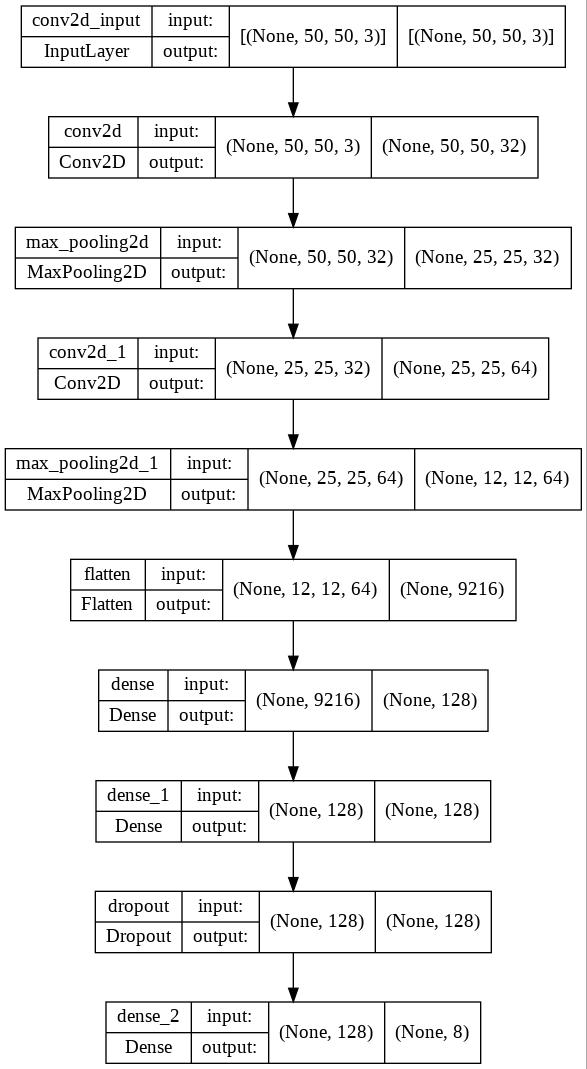

In [4]:
tf.keras.utils.plot_model(model, 'model.jpg', show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks_list = [
    ModelCheckpoint(filepath='model.h5',monitor='val_loss', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_loss', patience=10,verbose=1)]

#Training
history = model.fit(
        train_aug,
        steps_per_epoch=sum_train_samples // 128,
        epochs=100,
        callbacks = callbacks_list,
        validation_data=val_aug,
        verbose = 1,
        validation_steps=sum_validation_samples // 128)

Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 2.3886 - accuracy: 0.1577
Epoch 1: val_loss improved from inf to 2.03181, saving model to model.h5
11/11 [==============================] - 21s 952ms/step - loss: 2.3886 - accuracy: 0.1577 - val_loss: 2.0318 - val_accuracy: 0.2344
Epoch 2/100
11/11 [==============================] - ETA: 0s - loss: 2.0116 - accuracy: 0.2450
Epoch 2: val_loss improved from 2.03181 to 1.94578, saving model to model.h5
11/11 [==============================] - 9s 828ms/step - loss: 2.0116 - accuracy: 0.2450 - val_loss: 1.9458 - val_accuracy: 0.3516
Epoch 3/100
11/11 [==============================] - ETA: 0s - loss: 1.9266 - accuracy: 0.3068
Epoch 3: val_loss improved from 1.94578 to 1.83789, saving model to model.h5
11/11 [==============================] - 9s 852ms/step - loss: 1.9266 - accuracy: 0.3068 - val_loss: 1.8379 - val_accuracy: 0.3594
Epoch 4/100
11/11 [==============================] - ETA: 0s - loss: 1.8243 - accuracy: 0.3089

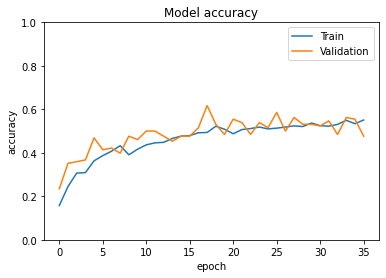

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Validation'])
plt.ylim([0,1])
plt.show()

In [ ]:
score = model.evaluate(val_aug)
print('Test loss: %.4f'% score[0])
print('Test accuracy %.4f'% score[1])

2/2 [==============================] - 1s 196ms/step - loss: 1.1937 - accuracy: 0.6013
Test loss: 1.1937
Test accuracy 0.6013


In [ ]:
from keras.models import load_model
import cv2 as cv
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
img = cv.imread('Image_luc_do_005.png')
img = cv.resize(img, dsize=(50, 50))
img = img.astype('float')*1./255
# Convert to tensor
img = np.expand_dims(img, axis=0)

In [ ]:
model_5 = load_model('model.h5')

In [ ]:
predict = model_5.predict(img)

In [ ]:
categories[np.argmax(predict[0])]

'Ran_luc_duoi_do'

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
                                             precision    recall  f1-score   support

                                 Milk_Snake       0.91      0.91      0.91        23
                                Ran_cap_nia       0.50      0.79      0.61        19
                                Ran_ho_mang       0.55      0.49      0.52        35
                              Ran_hoa_co_do       0.60      0.46      0.52        13
Ran_luc_cuom_(Protobothrops_mucrosquamatus)       0.18      0.36      0.24        14
                            Ran_luc_duoi_do       0.83      0.91      0.87        22
             Ran_nuoc_(dendrelaphis_pictus)       0.87      0.45      0.59        29
           Ran_nuoc_(xenochrophis_piscator)       0.33      0.24      0.28        21

                                   accuracy                           0.58       176
                                  macro avg       0.60      0.58      0.57       176
                               weighted a

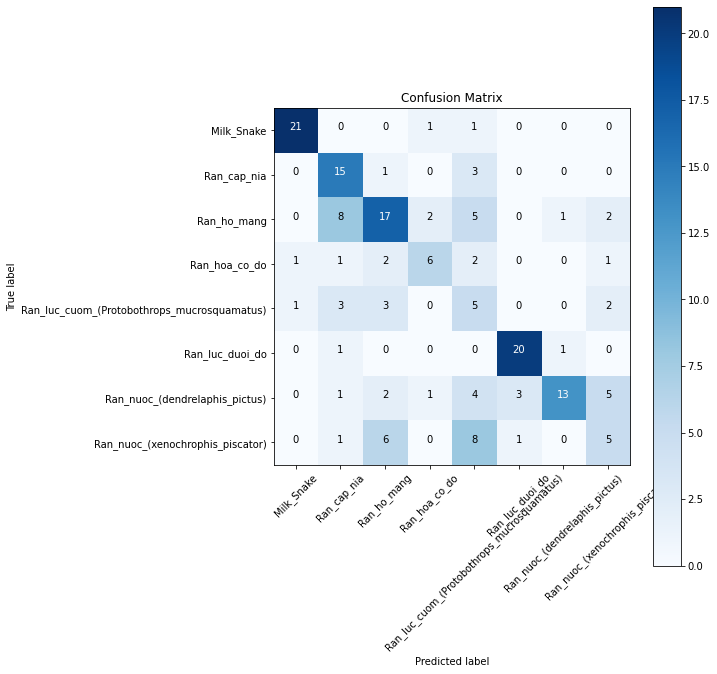

In [ ]:
Y_pred = model.predict(test_aug)
y_pred = np.argmax(Y_pred, axis=1)
target_names = categories

# Confusion Matrix
cm = confusion_matrix(test_aug.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

# Classification Report
print('Classification Report')
print(classification_report(test_aug.classes, y_pred, target_names=target_names))